This notebook presents a report on the implementation, testing and discussion on the benchmarking of the Ternary Search Tree(TST). Based on a the jupyter notebook provided for demonstration and testing purposes, all tests were passed as shown in the output.

Benchmarking was carried out on HPC with the output provided in the repository. The performance section presents a brief discussion of the output files containing the performance of the insertion and searching algorithms. 

### Testing 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ternary_search_tree import TernarySearchTree

In [3]:
tst = TernarySearchTree()

In [4]:
tst.insert('abc')

In [5]:
print(tst)

terminates: False
       char: a, Terminates: False
_eq:         char: b, Terminates: False
_eq:           char: c, Terminates: True


In [6]:
tst.insert('aqt')

In [7]:
print(tst)

terminates: False
       char: a, Terminates: False
_eq:         char: b, Terminates: False
_eq:           char: c, Terminates: True
_gt:           char: q, Terminates: False
_eq:             char: t, Terminates: True


In [8]:
len(tst)


2

In [9]:
tst.all_strings()

['abc', 'aqt']

In [10]:
tst.search('ab')

True

In [11]:
tst.search('ac')

False

In [12]:
tst.insert('')

In [13]:
len(tst)

3

In [14]:
print(tst)

terminates: True
       char: a, Terminates: False
_eq:         char: b, Terminates: False
_eq:           char: c, Terminates: True
_gt:           char: q, Terminates: False
_eq:             char: t, Terminates: True


In [15]:
tst.all_strings()

['', 'abc', 'aqt']

In [16]:
tst = TernarySearchTree()
with open('data/search_trees/insert_words.txt') as file:
    words = [
        line.strip() for line in file
    ]
for word in words:
    tst.insert(word)
unique_words = set(words)

In [17]:
assert len(tst) == len(unique_words), \
       f'{len(tst)} in tree, expected {len(unique_words)}'

In [18]:
for word in unique_words:
    assert tst.search(word), f'{word} not found'

In [19]:
for word in unique_words:
    for i in range(len(word) - 1, 0, -1):
        prefix = word[:i]
        assert tst.search(prefix), f'{prefix} not found'

In [20]:
for word in unique_words:
    for i in range(len(word), 0, -1):
        prefix = word[:i]
        if prefix not in unique_words:
            assert not tst.search(prefix, exact=True), \
                   f'{prefix} found'

In [21]:
assert tst.search(''), 'empty string not found'

In [22]:
assert not tst.search('', exact=True), 'empty string found'

In [23]:
with open('data/search_trees/not_insert_words.txt') as file:
    for line in file:
        word = line.strip()
        assert not tst.search(word), f'{word} should not be found'

In [24]:
all_strings = tst.all_strings()
assert len(all_strings) == len(unique_words), \
       f'{len(all_strings)} words, expected {len(unique_words)}'
assert sorted(all_strings) == sorted(unique_words), 'words do not match'

# Performance

The benchmarking involved increasing the number of words and also the number of runs was changed from 10, 30 and 100 to observe any changes. The final number of runs used was 30 as it seemed sufficient to provide accurate results.

#### Insertion Benchmark

In [25]:
import random
import time
import matplotlib.pyplot as plt

with open('data/search_trees/corncob_lowercase.txt') as file:
    words = [line.strip() for line in file]

sizes = [100, 500, 1_000, 5_000, 10_000, 20_000, 30_000, 40_000, 50_000]
samples = [
    random.sample(words, k=size) for size in sizes
]

nr_runs = 10
times = {}
insert_sample = random.sample(words, k=20)
for sample in samples:
    tstree = TernarySearchTree()
    for word in sample:
        tstree.insert(word)
    times[len(sample)] = 0.0
    for _ in range(nr_runs):
        start_time = time.time_ns()
        for word in insert_sample:
            tstree.insert(word)
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    times[len(sample)] /= nr_runs*1_000_000.0
times

{100: 0.0,
 500: 0.10887,
 1000: 0.0,
 5000: 0.09963,
 10000: 0.10091,
 20000: 0.0,
 30000: 0.0,
 40000: 0.0983,
 50000: 0.09176}

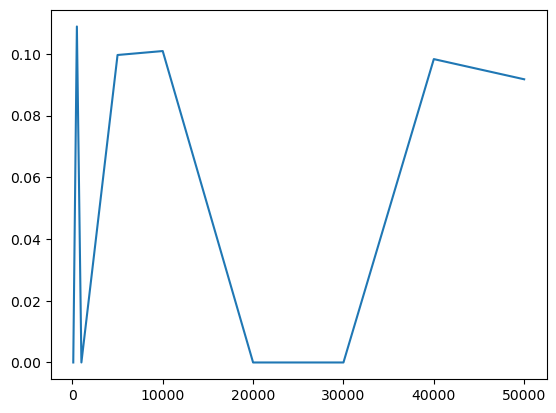

In [26]:
plt.plot(times.keys(), times.values());

#### Results from HPC

From the results, we observe that as the number of words increases, the average time per insertion also increases. This is expected, as a larger tree leads to greater depth and more comparisons during insertion, thereby increasing the operations's cost. Wit smaller trees, the insertions are faster due to less traversing involved.

![Description of image](insertion_benchmark_plot.png)

#### Search Benchmark

In [27]:
nr_runs = 10
times = {}
insert_sample = random.sample(words, k=20)
for sample in samples:
    tstree = TernarySearchTree()
    for word in sample:
        tstree.insert(word)
    times[len(sample)] = 0.0
    for _ in range(nr_runs):
        start_time = time.time_ns()
        for word in insert_sample:
            tstree.search(word)
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    times[len(sample)] /= nr_runs*1_000_000.0
times

{100: 0.09851,
 500: 0.0,
 1000: 0.1052,
 5000: 0.0,
 10000: 0.1012,
 20000: 0.09964,
 30000: 0.11811,
 40000: 0.09934,
 50000: 0.15298}

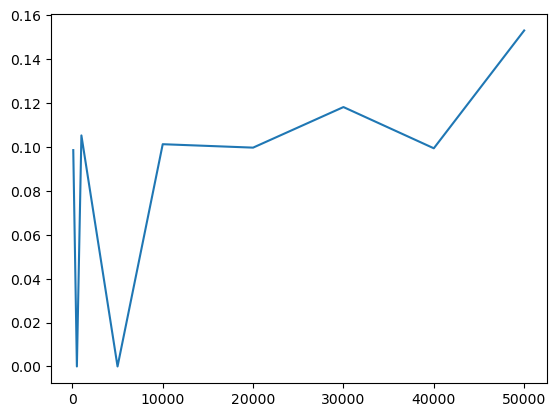

In [28]:
plt.plot(times.keys(), times.values());

#### Results from HPC

For the output for the searching operation, a similar pattern is observed as the number of search queries increases, the total search time increases. The size of the ternary search tree affects the search time and this is expected as with larger trees, as the depth is larger and requires more traversal. The TST can handle upto 30,000 words quite efficiently as the search times are within a reasonable range upto 150 ms.

![Description of image](searching_benchmark_plot.png)
